# Argo data by float

## Data files organized by float

<img src="https://github.com/euroargodev/argoonlineschool/raw/master/images/dac.png" alt="xarray logo" width="650"/>

When accessing the **da**c folder in any of the *FTP* or *HTTP* sites of any of the two GDACs you will find several (11) folders, one for each of the DACs.  Within each one of these folder there is one folder for each one of the floats processed by this particular *DAC*. 

In the example here, we will use data from float with **WMO** number 6901254, that is proceesed by coriolis (later we will see how to find the DAC for each float), therefore within the folder `./6901254`, we find the following files and folder:

- 6901254_Rtraj.nc 
- 6901254_meta.nc  
- 6901254_prof.nc  
- 6901254_tech.nc  
- ./profiles

we will describe the content of each of these files later, but let's focus on the folder `./profiles/` since it contains one file for each one of the hydrographic cycles of the float. **R6901254_001.nc** is the file that contains the data from the first cycle. It begins with a *R* since it is the real time data, if it began with an *D* it would be adjusted data, or Delayed Mode data; we will see and example in section [**ACTUALIZAR**]. 

Additionally some argo floats, as 6901254, also made obserations in the first descent from the surface to the parking depth, in this case the name of the files with this data would be **R6901254_001D.nc**.  

In general, the format of the file names for individual profiles are `<R/D><FloatWmoID>_<XXX><D>.nc` where :

- The initial *R* indicates Real-Time data, the initial *D* indicates Delayed-Mode data
- *XXX* is the cycle number
- The second *D* indicates a descending profile, if exist, while profiles without this D are collected during ascent.


Note that it may happens that, in the future, you try to downdload the fles from float 6901254 and there is not `R6901254_001.nc` and `R6901254_001D.nc` files, but you find `D6901254_001.nc` and `D6901254_001D.nc` since the R-files are substituded by the D-files once the data is adjusted, we will describe that in detail in section [**ACTUALIZAR**]

>The data from the float is pre-downloaded in the *./Data* folder, but you can dowload it from the Coriolis GDAC. See the [Data](https://euroargodev.github.io/argoonlineschool/README.html#data) section for instructions on how to download the data.



## Reading an Argo CTD cycle data - the building blocks of Argo

First, import libraries

In [38]:
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

### The first cycle

An Argo cycle starts with a descent toward deep water, usually from the surface, and ends after the next programmed ascent to the surface. During the surface interval, data transmission typically occurs but it is not a requirement for a cycle to have occurred, but if ocurrs, the cycle ends after the full surface interval has been completed.

Each cycle of a float has a unique number, increased by one after each ascent to the surfce or shallow water. For most floats, this will be the cycle number transmitted by the float. Profile measurements (e.g. pressure, temperature, salinity) are performed during ascent, occasionally during descent. Subsurface measurements during parking are sometime performed (e.g. every 12 hours

Float cycle numbers usually start at 1. The next cycles are increasing numbers (e.g. 2, 3,...N). 

Very conveniently some floats transmit their configuration during the transmissions before they descent for profile 1. Cycle 0 contains the first surface drift with technical data transmission or configuration information. This data is reported in the technical data files. Cycle 0 may contain subsurface measurements if a descending/ascending profile is performed before any data transmission. The time length of this cycle is usually shorter than the next nominal cycles. The cycle time is therefore regular only for later profiles and may be variable if the float is reprogrammed after its deployment.

Floats can profile either on descent or ascent. Most floats profile on ascent.


In [14]:
cy1  = xr.open_dataset('./Data/6901254/profiles/R6901254_001.nc')

Now we will see how useful is the **Self-Describing** propierty of the netCDF format. Printing the object gives you summary information

In [15]:
cy1

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 3, N_LEVELS: 97, N_PARAM: 3, N_PROF: 2)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    PLATFORM_TYPE                 (N_PROF) object ...
    FLOAT_SERIAL_NO               (N_PROF) object ...
    FIRMWARE_VERSION              (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) datetime64[ns] ...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) datetime64[ns] ...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    VERTICAL_SAMPLING_SCHEME      (N_PROF) object ...
    CONFIG_MISSION_NUMBER         (N_PROF) float64 ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    HISTORY_INSTITUTION           (N_HISTORY, N_PROF) object ...
    HISTORY_STEP                  (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE              (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE_RELEASE      (N_HISTORY, N_PROF) object ...
    HISTORY_REFERENCE             (N_HISTORY, N_PROF) object ...
    HISTORY_DATE                  (N_HISTORY, N_PROF) object ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CAL

Now we see how useful is the **Self-Describing** propierty of the netCDF format. Printing the object gives you summary information. Let's focus in the core variables, TEMP, SALT and PRES. Although we could inspect the previous print-out of the cy1 dataset, we can use the data itself:

In [16]:
print(f"The core variables are: \n'{cy1.TEMP.long_name}', \n'{cy1.PSAL.long_name}' and \n'{cy1.PRES.long_name}' ")

The core variables are: 
'Sea temperature in-situ ITS-90 scale', 
'Practical salinity' and 
'Sea water pressure, equals 0 at sea-level' 


In [17]:
print(f"The dimesions of TEMP are:\n {cy1.TEMP.dims[0]}:{cy1.TEMP.shape[0]} \n {cy1.TEMP.dims[1]}:{cy1.TEMP.shape[1]}")

The dimesions of TEMP are:
 N_PROF:2 
 N_LEVELS:97


For the first cycle there are two profiles (N_PROF=2) ... lets plot them:

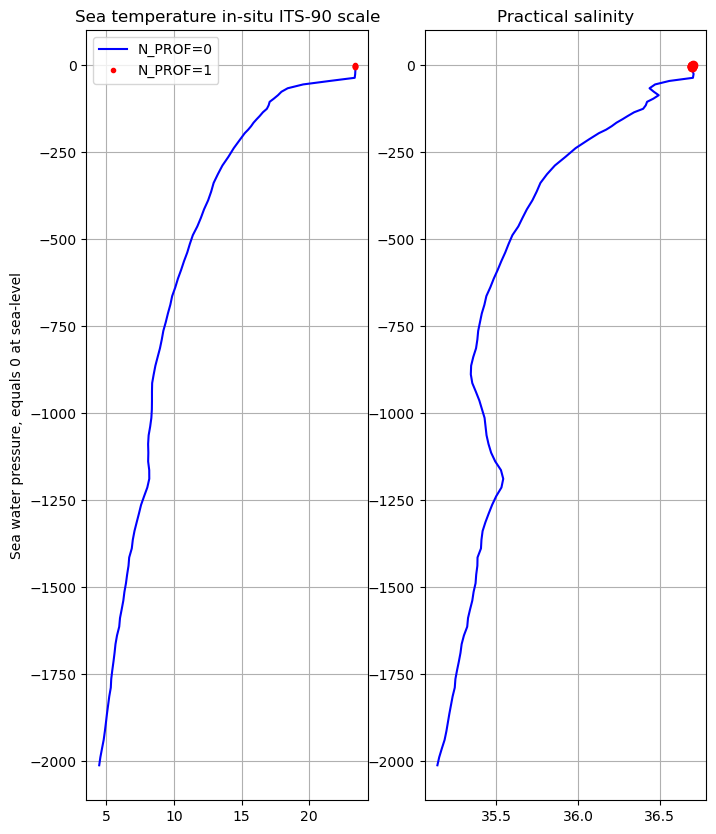

In [37]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(cy1.TEMP[0],-cy1.PRES[0],'b-',label='N_PROF=0')
ax[0].plot(cy1.TEMP[1],-cy1.PRES[1],'r.',label='N_PROF=1')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend()

#Salinity
ax[1].plot(cy1.PSAL[0],-cy1.PRES[0],'b-',label='N_PROF=0')
ax[1].plot(cy1.PSAL[1],-cy1.PRES[1],'ro',label='N_PROF=1')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].grid()

This is within the cycle file, there area two profiles. The first one (N_PROF=0 in blue) it is measured during its ascend from 2000 dbar to 5 dbar and its constitute the core argo program; the second one (N_PROF=1 in red) only measures the top 5 dbar. 
The data variable *VERTICAL_SAMPLING_SCHEME* contains all the details:

In [19]:
print(f"The first profile is the: { str(cy1.VERTICAL_SAMPLING_SCHEME[0].values) }")
l=cy1.VERTICAL_SAMPLING_SCHEME[0].values

The first profile is the: b'Primary sampling: averaged [10 sec sampling, 25 dbar average from 2000 dbar to 200 dbar; 10 sec sampling, 10 dbar average from 200 dbar to 10 dbar; 10 sec sampling, 1 dbar average from 10 dbar to 5.5 dbar]                                                   '


In [20]:
print(f"The second profile is the: {cy1.VERTICAL_SAMPLING_SCHEME[1].values}")

The second profile is the: b'Near-surface sampling: averaged, unpumped [10 sec sampling, 1 dbar average from 5.5 dbar to surface]                                                                                                                                                            '


As a rule of thumb the first profile is always the **core mission argo CTD profile** (2000 dbar - 5 dbar). In the case of this float there is an additional second profile, with higher resolution (10 sec sampling and 1dbar average) but unpumped, this is the sensor of conductity (for salinity) is not pumping water through to avoid contamination or biodeposition from the surface. The data from this second profile is used, mostly, for calibrations of SST observations from satellite.

In the *Reference table 16: vertical sampling schemes* of the *Argo Data Management Team. Argo user’s manual. https://doi.org/10.13155/29825* there is a description of all the different options in VERTICAL_SAMPLING_SCHEME. However a discusion of all of them is beyond the objective of this AoS than focus on understanding the basic concepts.


---
As mentioned before, some floats also make measurmentes in the descending phase of the cycle:

In [21]:
cy1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')

In [22]:
print(f"The dimesions of TEMP are:\n {cy1D.TEMP.dims[0]}:{cy1D.TEMP.shape[0]} \n {cy1D.TEMP.dims[1]}:{cy1D.TEMP.shape[1]}")

The dimesions of TEMP are:
 N_PROF:1 
 N_LEVELS:51


in this case there is only one profile, let's plot it together with the ascending data (cy1):


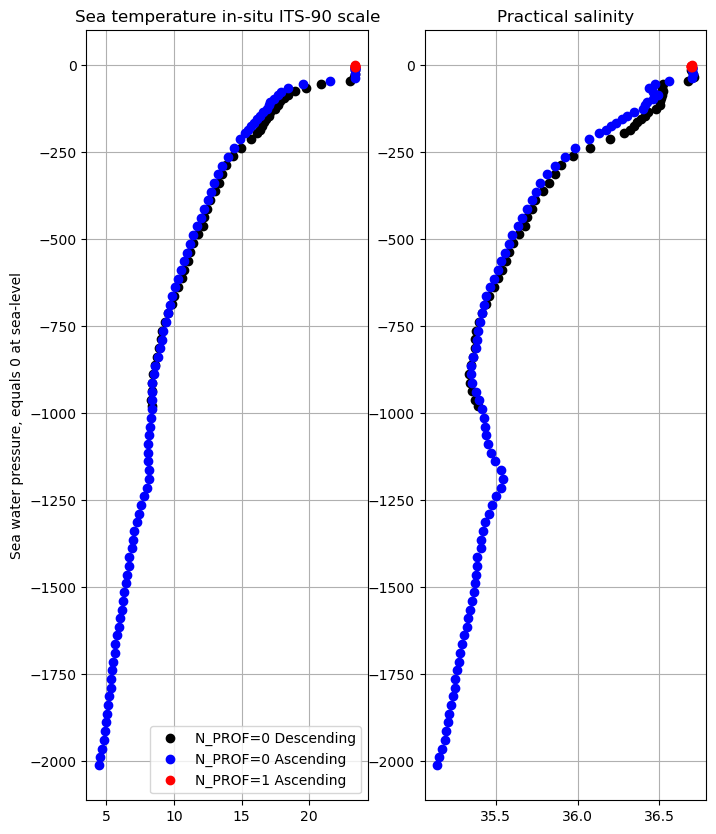

In [34]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(cy1D.TEMP[0],-cy1D.PRES[0],'ko',label='N_PROF=0 Descending')
ax[0].plot(cy1.TEMP[0],-cy1.PRES[0],'bo',label='N_PROF=0 Ascending')
ax[0].plot(cy1.TEMP[1],-cy1.PRES[1],'ro',label='N_PROF=1 Ascending')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend()

#Salinity
ax[1].plot(cy1D.PSAL[0],-cy1D.PRES[0],'ko',label='N_PROF=0 Descending')
ax[1].plot(cy1.PSAL[0],-cy1.PRES[0],'bo',label='N_PROF=0 Ascending')
ax[1].plot(cy1.PSAL[1],-cy1.PRES[1],'ro',label='N_PROF=1 Ascending')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].grid()

In [24]:
#print(cy1D.PSAL)
print(f"{str(cy1D.DIRECTION.values)}")
print(cy1.CYCLE_NUMBER.values)

[b'D']
[1. 1.]


hablar sobre ptem...

In [25]:
xrDS1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')
print(xrDS1D.JULD.values[0])


2018-10-23T20:54:00.000000000


## Using argopy

In [40]:
from argopy import DataFetcher as ArgoDataFetcher
plt.style.use('default')

argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

In [41]:
apDS=argo_loader.float(6901254).to_xarray()

In [43]:
apDS2=argo_loader.profile(6901254,1).to_xarray()

In [ ]:
data=apDS2.argo.point2profile()
data

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC). All additional parameters are managed in B-Argo data files (see §0).   

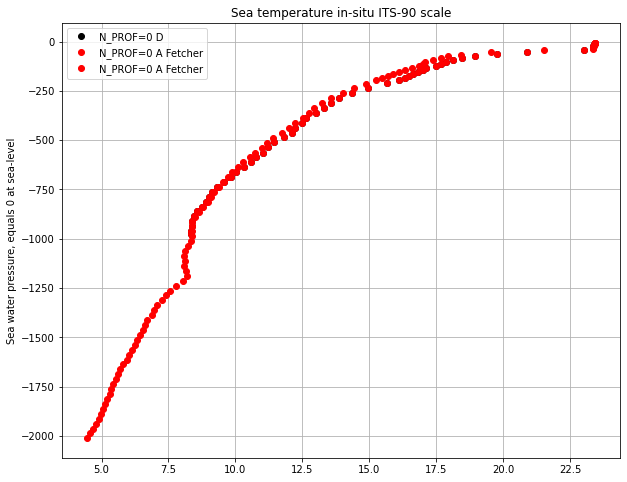

In [39]:

fig, ax = plt.subplots(figsize=(10,8))

#Temperature
ax.plot(cy1D.TEMP[0],-cy1D.PRES[0],'ko',label='N_PROF=0 D')
#ax.plot(cy1.TEMP[0],-cy1.PRES[0],'bo',label='N_PROF=0 A')
ax.plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 A Fetcher')
ax.plot(data.TEMP[1],-data.PRES[1],'ro',label='N_PROF=0 A Fetcher')
ax.set_title(cy1.TEMP.long_name)
ax.set_ylabel(cy1.PRES.long_name)
ax.grid()
ax.legend()

## Meta data

## Trayectory data

In [14]:
Rtraj = xr.open_dataset('./Data/6901254/6901254_Rtraj.nc')

In [1]:
Rtraj.DataVariables

NameError: name 'Rtraj' is not defined

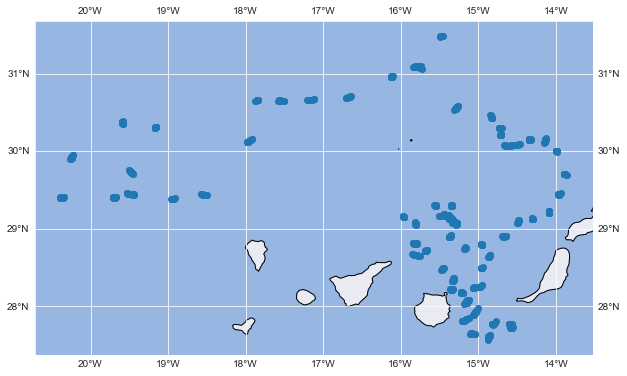

In [57]:
import cartopy.crs as ccrs
import cartopy

fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(Rtraj.LONGITUDE,Rtraj.LATITUDE,'o')

ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

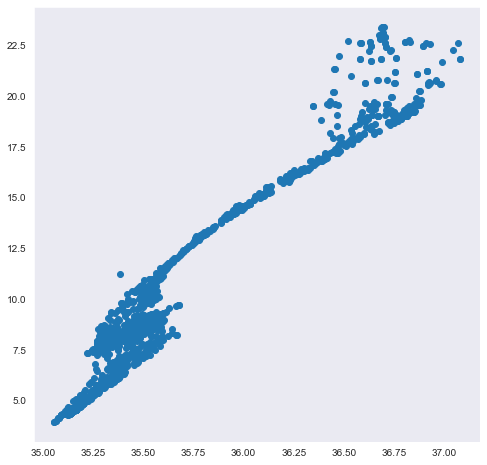

In [61]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(Rtraj.PSAL,Rtraj.TEMP,'o')

In [50]:
Rtraj.PRES

<xarray.DataArray 'PRES' (N_MEASUREMENT: 4289)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:              Sea water pressure, equals 0 at sea-level
    standard_name:          sea_water_pressure
    units:                  decibar
    valid_min:              0.0
    valid_max:              12000.0
    C_format:               %7.1f
    FORTRAN_format:         F7.1
    resolution:             1.0
    comment_on_resolution:  PRES resolution is 1 dbar, except for measurement...
    axis:                   Z